In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

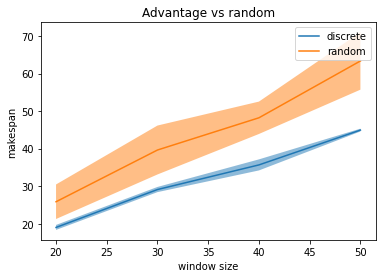

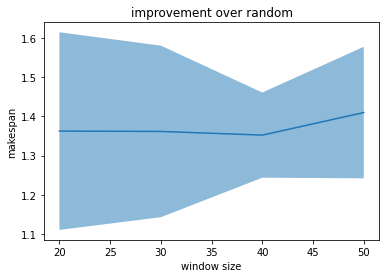

In [21]:
df = pd.read_csv('discreteVsrandom.csv')
means = []
means_rand = []
stds = []
stds_rand = []
means_ratio = []
stds_ratio = []
names = []
for name, group in df.groupby('window size'):
    group['ratio'] = group['random result'] / group['discrete result']
    means.append(group['discrete result'].mean())
    means_rand.append(group['random result'].mean())
    means_ratio.append(group['ratio'].mean())
    stds.append(group['discrete result'].std())
    stds_rand.append(group['random result'].std())
    stds_ratio.append(group['ratio'].std())
    names.append(name)
means = np.array(means)
stds = np.array(stds)
means_rand = np.array(means_rand)
stds_rand = np.array(stds_rand)
means_ratio = np.array(means_ratio)
stds_ratio = np.array(stds_ratio)
plt.plot(names, means, label='discrete')
plt.plot(names, means_rand, label='random')
plt.title('Advantage vs random')
plt.xlabel('window size')
plt.ylabel('makespan')
plt.fill_between(names, means+stds, means-stds, alpha=0.5)
plt.fill_between(names, means_rand+stds_rand, means_rand-stds_rand, alpha=0.5)
plt.legend()
plt.show()

plt.plot(names, means_ratio)
plt.title('improvement over random')
plt.xlabel('window size')
plt.ylabel('makespan')
plt.fill_between(names, means_ratio+stds_ratio, means_ratio-stds_ratio, alpha=0.5)
plt.show()